# About
From [simple-pid github](https://github.com/m-lundberg/simple-pid/blob/master/examples/water_boiler/water_boiler.py)

In [1]:
import time
import matplotlib.pyplot as plt
from simple_pid import PID

In [2]:
class WaterBoiler:
    """
    Simple simulation of a water boiler which can heat up water
    and where the heat dissipates slowly over time
    """

    def __init__(self):
        self.water_temp = 20

    def update(self, boiler_power, dt):
        if boiler_power > 0:
            # Boiler can only produce heat, not cold
            self.water_temp += 2 * boiler_power * dt

        # Some heat dissipation
        self.water_temp -= 20 * dt
        return self.water_temp

In [3]:

boiler = WaterBoiler()
water_temp = 80

pid = PID(15, 1.2, 0, setpoint=water_temp)
pid.output_limits = (0, 100)

start_time = time.time()
last_time = start_time

# Keep track of values for plotting
setpoint, y, x = [], [], []

while time.time() - start_time < 6:
    current_time = time.time()
    dt = current_time - last_time

    power = pid(water_temp)
    water_temp = boiler.update(power, dt)

    x += [current_time - start_time]
    y += [water_temp]
    setpoint += [pid.setpoint]

    if current_time - start_time > 1:
        pid.setpoint = 50

    if current_time - start_time > 3:
        pid.setpoint = 70

    if current_time - start_time > 4:
        pid.setpoint = 100

    last_time = current_time

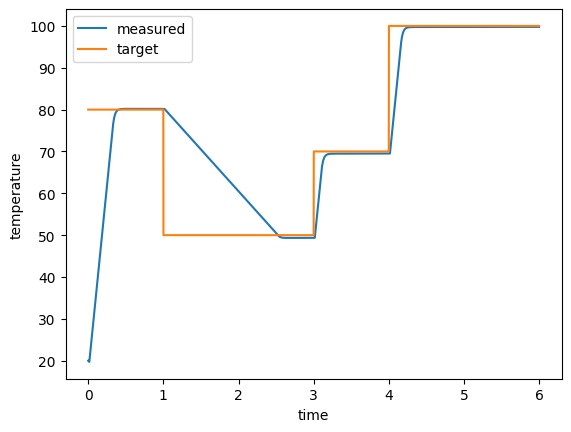

In [4]:
plt.plot(x[::20], y[::20], label='measured')
plt.plot(x[::50], setpoint[::50], label='target')
plt.xlabel('time')
plt.ylabel('temperature')
plt.legend()